In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import shutil
import pickle
import glob
import pandas as pd
import shuffle
import numpy as np
import itertools, os
from tqdm import tqdm
from creme import custom_model
from creme import creme
from creme import utils

2024-03-13 09:39:39.902276: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model_name = 'enformer'
csv_dir = f'../../results/summary_csvs/{model_name}/'
sufficient_cre_df = pd.read_csv(f'{csv_dir}/sufficient_CREs.csv')
pdf_dir = utils.make_dir('pdfs/multiplicity/')
N_iter = 15

In [3]:
multiplicity_dfs = pd.read_csv("../../results/summary_csvs/enformer/multiplicity.csv")

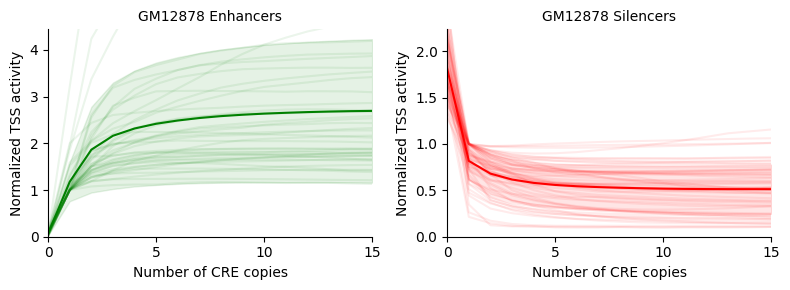

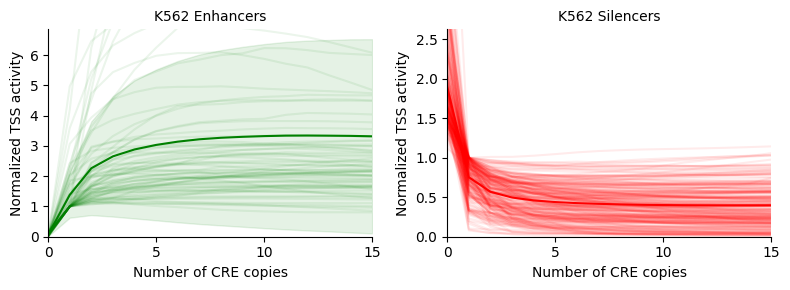

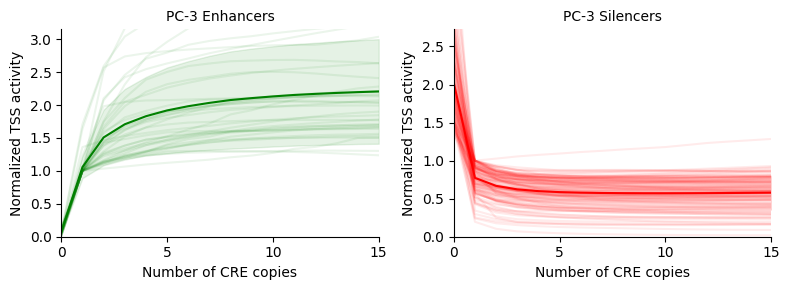

In [5]:
for cell, cell_df in multiplicity_dfs.groupby('cell_line'):
    fig, axes = plt.subplots(1, 2, figsize=[8, 3])
    for tile_type, df in cell_df.groupby('tile class'):
        
        tss_activity = []
        if tile_type == 'Enhancer':
            c = 'g'
            ax = axes[0]
        else:
            c = 'r'
            ax = axes[1]
        for i, one_seq_df in df.groupby('seq_id'):
            
            v = one_seq_df['Normalized TSS activity'].values
            ax.plot(v, alpha=0.08, color=c)
            tss_activity.append(v)
        mean_tss = np.array(tss_activity).mean(axis=0)
        std_tss = np.array(tss_activity).std(axis=0)

        ax.plot(mean_tss, color=c)
        if cell== 'K562' and tile_type=='Silencer':
            ax.fill_between(range(mean_tss.shape[0]), mean_tss-std_tss, mean_tss+std_tss, color=c, alpha=0.005)
        else:
            ax.fill_between(range(mean_tss.shape[0]), mean_tss-std_tss, mean_tss+std_tss, color=c, alpha=0.1)
        ax.set_ylim(0, max((mean_tss+std_tss)*1.05))
        # plt.ylim(0, 4)
        ax.set_title(f'{cell} {tile_type}s', fontsize=10)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xticks([0, 5, 10, 15])
        ax.set_xlabel('Number of CRE copies', fontsize=10)
        ax.set_ylabel('Normalized TSS activity', fontsize=10)
        ax.set_xlim(0, 15)
    plt.tight_layout()
    fig.savefig(f'{pdf_dir}/{cell}_enhancers_silencers.pdf')

